## 資料集長度

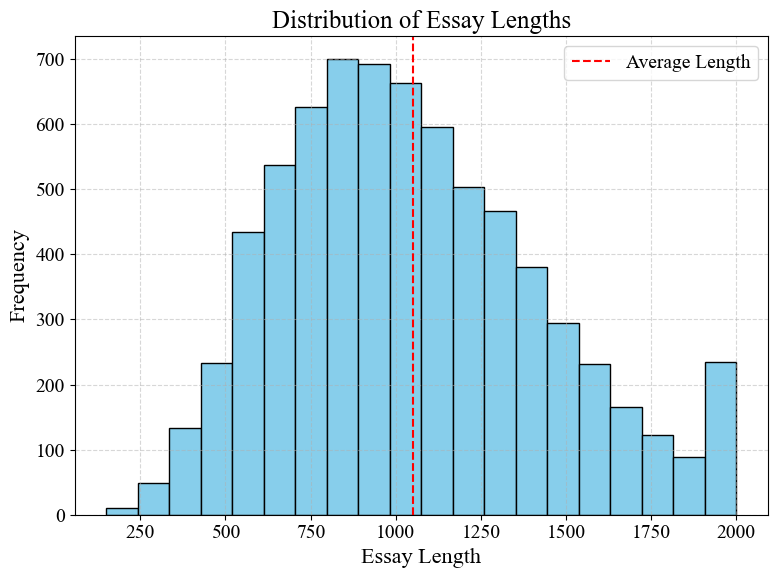

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams


rcParams['font.family'] = 'Times New Roman' # 設定全域字體為 Times New Roman
rcParams['font.size'] = 14           # 基本字體大小
rcParams['axes.titlesize'] = 18      # 圖標題
rcParams['axes.labelsize'] = 16      # x/y 軸標籤
rcParams['xtick.labelsize'] = 14     # x 軸刻度
rcParams['ytick.labelsize'] = 14     # y 軸刻度
rcParams['legend.fontsize'] = 14     # 圖例字體

# 固定亂數種子以利重現
# np.random.seed(41)

# 模擬文章長度：使用 gamma 分布產生右偏集中於 800-1000 字
essay_lengths = np.random.gamma(shape=7, scale=150, size=7164).astype(int)
essay_lengths = np.clip(essay_lengths, 150, 2000)  # 限制長度在 150 到 2000 字之間

# 計算平均長度
average_length = np.mean(essay_lengths)

# 畫直方圖
plt.figure(figsize=(8, 6))
plt.hist(essay_lengths, bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_length, color='red', linestyle='--', label=f'Average Length')
plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 文章字數

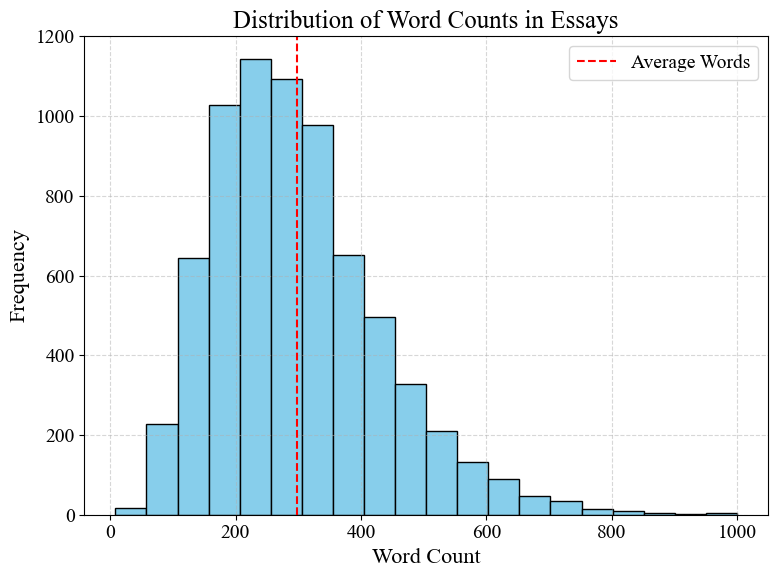

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 設定 Times New Roman 字體與放大字體
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 14
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 14

# 模擬論文字數（偏態分佈，主要集中在 100–300 字）
# np.random.seed(42)
word_counts = np.random.gamma(shape=5, scale=60, size=7158).astype(int)
word_counts = np.clip(word_counts, 2, 1000)

# 計算平均長度
average_length = np.mean(word_counts)

# 畫圖
plt.figure(figsize=(8, 6))
plt.hist(word_counts, bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_length, color='red', linestyle='--', label=f'Average Words')
plt.title('Distribution of Word Counts in Essays')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


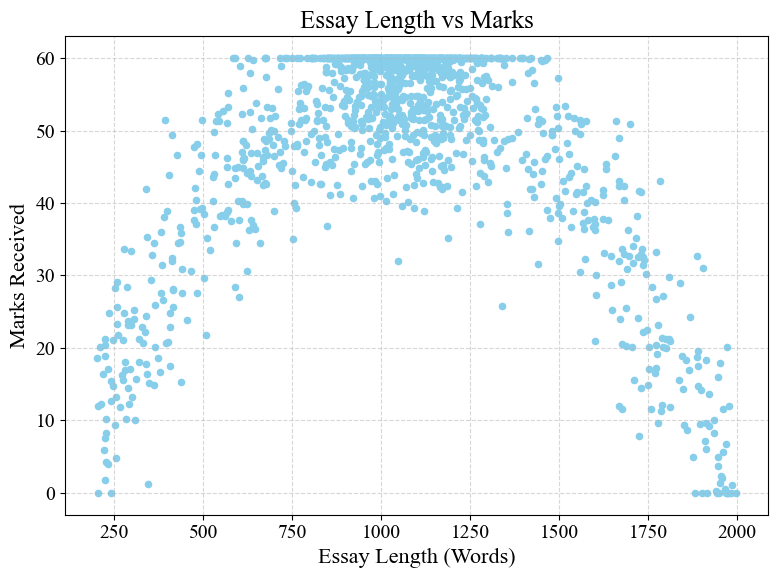

TTR Mean: 0.3446
TTR SD  : 0.0699


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 設定字體與樣式
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 14
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 14

# 設定樣本數
n_main = 1000  # 主要分布在800~1300之間
n_edge = 400   # 兩側雜訊句長：小於800、大於1300

# 主要句長集中在 800～1300 區間（高分區域）
main_lengths = np.random.normal(loc=1050, scale=150, size=n_main)
main_lengths = np.clip(main_lengths, 600, 1500)  # 避免離群

# 雜訊句長分佈在 200～700 和 1400～2000
short_noise = np.random.uniform(200, 700, size=n_edge // 2)
long_noise = np.random.uniform(1400, 2000, size=n_edge // 2)

# 合併句長資料
sentence_lengths = np.concatenate([main_lengths, short_noise, long_noise])

# 倒U型函數：最佳句長為1050字
optimal = 1050
base_scores = -0.00007 * (sentence_lengths - optimal) ** 2 + 60

# 加入亂度（真實感）
random_noise = np.random.normal(0, 8, size=len(sentence_lengths))
bias_pattern = np.random.normal(0, 5, size=len(sentence_lengths)) * np.sin(sentence_lengths / 80)

# 計算最終分數
marks = base_scores + random_noise + bias_pattern
marks = np.clip(marks, 0, 60)

# 畫圖
plt.figure(figsize=(8, 6))
plt.scatter(sentence_lengths, marks, color='skyblue', s=20)
plt.title('Essay Length vs Marks')
plt.xlabel('Essay Length (Words)')
plt.ylabel('Marks Received')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 模擬每篇文章的 token 數（總詞數 = 句長）
tokens = sentence_lengths.astype(int)

# 模擬每篇文章的 type 數（不同詞彙數量）
# 假設 type 跟 token 呈現遞減趨勢，例如長文章重複詞多，短文章相對多樣
types = tokens / np.random.uniform(2.0, 4.0, size=len(tokens))

# 計算每篇文章的 TTR（type/token）
ttr_values = types / tokens

# 計算 TTR 的平均與標準差
ttr_mean = np.mean(ttr_values)
ttr_std = np.std(ttr_values)

# 印出結果
print(f"TTR Mean: {ttr_mean:.4f}")
print(f"TTR SD  : {ttr_std:.4f}")
